In [1]:
#Data Analysis & Data wrangling
import numpy as np
import pandas as pd
from collections import Counter

#Visualization
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline

# Machine Learning Libraries

#Sci-kit learn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

#statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
lead = pd.read_csv("Leads.csv")
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
lead.tail()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,...,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


Inspect Dataframe
 

In [5]:
#database dimension
lead.shape
lead.size
print("Number of Row          :",len(lead.index))
print("Number of Columns      :",len(lead.columns))

Number of Row          : 9240
Number of Columns      : 37


In [6]:
#checking numerical columns statistics
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
#info about the column types etc. 
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

The data types of the columns are float, integer and object type. We can see there are some null values in the column. Let's inspect the null values first

# Null Value Calculation

There are quite a few columns which has 'Select' as one of the category. This is most probably because the person has not filled that field. We will replace this field with NaN 
    

In [8]:
lead = lead.replace('Select', np.nan)

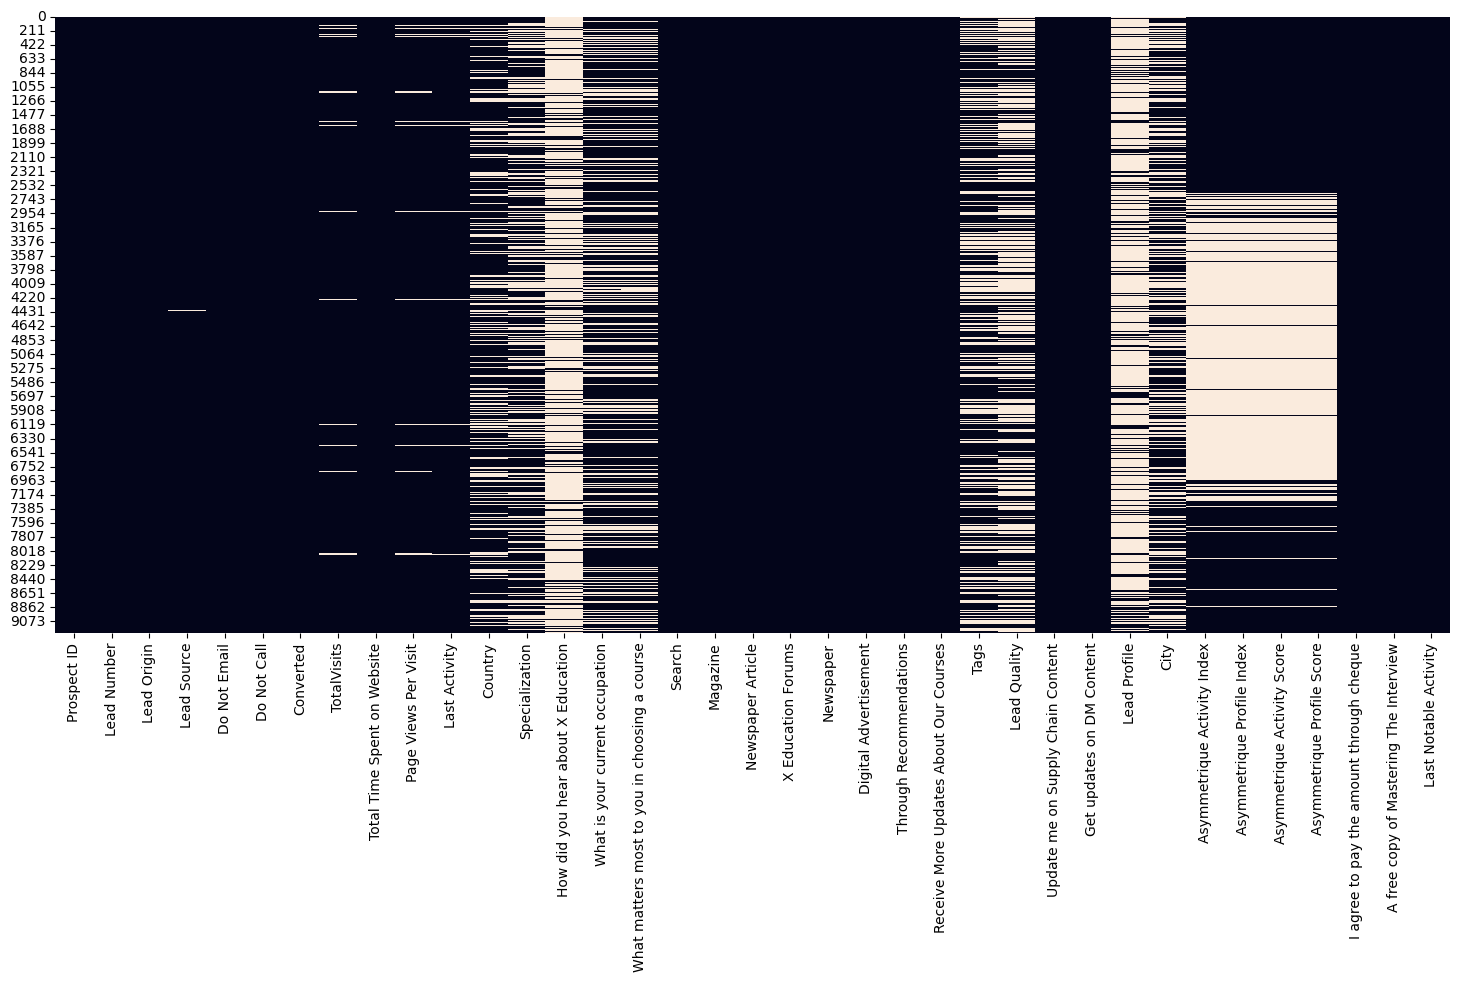

In [9]:
plt.figure(figsize = (18,8))
sns.heatmap(lead.isnull(),cbar = False)
plt.show()

Column wise Null Value calculation


In [10]:
#Column wise null values in train data set 
null_perc = pd.DataFrame(round((lead.isnull().sum())*100/lead.shape[0],2)).reset_index()
null_perc.columns = ['Column Name', 'Null Values Percentage']
null_value = pd.DataFrame(lead.isnull().sum()).reset_index()
null_value.columns = ['Column Name', 'Null Values']
null_lead = pd.merge(null_value, null_perc, on='Column Name')
null_lead.sort_values("Null Values", ascending = False)

,Column Name,Null Values,Null Values Percentage
13,How did you hear about X Education,7250,78.46
28,Lead Profile,6855,74.19
25,Lead Quality,4767,51.59
33,Asymmetrique Profile Score,4218,45.65
32,Asymmetrique Activity Score,4218,45.65
30,Asymmetrique Activity Index,4218,45.65
31,Asymmetrique Profile Index,4218,45.65
29,City,3669,39.71
12,Specialization,3380,36.58
24,Tags,3353,36.29


**Row wise Null Value calculation**
          

In [88]:
Row_Null50_Count = len(lead[lead.isnull().sum(axis=1)/lead.shape[1]>0.5])
Row_Null50_Count

0

There are 17 columns with null values. 7 columns have more than 45% unknowns which we should drop as imputing these columns will introduce bias. No rows whcih have more than 50% null values. 

# Delete High Null Columns
 

Clearly Prospect ID & Lead Number are two variables that are just indicative of the ID number of the Contacted People & can be dropped. We will also remove the columns which has more than 45% Null Values.
Also, some of the variables like Lead Quality, Tags, Asymmetrique scores and profile etc. are created by the sales team once they contact the potential lead. These variables will not be available for the model building as these features would not be available before the lead is being contacted.
Last Notable Activity is an intermediate column which is an update while the sales team representative is in touch with the lead.Thus, we can drop these columns too.

In [13]:
cols_to_drop = ['Prospect ID','Lead Number','How did you hear about X Education','Lead Profile',
                'Lead Quality','Asymmetrique Profile Score','Asymmetrique Activity Score',
               'Asymmetrique Activity Index','Asymmetrique Profile Index','Tags','Last Notable Activity']

In [14]:
#dropping unnecessary columns

lead.drop(cols_to_drop, 1, inplace = True)
len(lead.columns)

26

 We have suceessfully deleted 10 columns where the columns had high null values or they are information which will not be available for models when it ran as they are calculated / selected by sales personnel when they contact potential leads.

**Segregating Categorical & Numerical Values**

In [15]:
categorical_col = lead.select_dtypes(exclude =["number"]).columns.values
numerical_col = lead.select_dtypes(include =["number"]).columns.values


**Categorical Columns Null Value Treatment**

In [16]:
# Checking unique values and null values for the categorical columns
def Cat_info(df, categorical_column):
    df_result = pd.DataFrame(columns=["columns","values","unique_values","null_values","null_percent"])
    
    df_temp=pd.DataFrame()
    for value in categorical_column:
        df_temp["columns"] = [value]
        df_temp["values"] = [df[value].unique()]
        df_temp["unique_values"] = df[value].nunique()
        df_temp["null_values"] = df[value].isna().sum()
        df_temp["null_percent"] = (df[value].isna().sum()/len(df)*100).round(1)
        df_result = df_result.append(df_temp)
    
    df_result.sort_values("null_values", ascending =False, inplace=True)
    df_result.set_index("columns", inplace=True)
    return df_result

In [17]:
df_cat = Cat_info(lead, categorical_col)
df_cat

,values,unique_values,null_values,null_percent
columns,,,,
City,"[nan, Mumbai, Thane & Outskirts, Other Metro C...",6,3669,39.7
Specialization,"[nan, Business Administration, Media and Adver...",18,3380,36.6
What matters most to you in choosing a course,"[Better Career Prospects, nan, Flexibility & C...",3,2709,29.3
What is your current occupation,"[Unemployed, Student, nan, Working Professiona...",6,2690,29.1
Country,"[nan, India, Russia, Kuwait, Oman, United Arab...",38,2461,26.6
Last Activity,"[Page Visited on Website, Email Opened, Unreac...",17,103,1.1
Lead Source,"[Olark Chat, Organic Search, Direct Traffic, G...",21,36,0.4
Lead Origin,"[API, Landing Page Submission, Lead Add Form, ...",5,0,0.0
Digital Advertisement,"[No, Yes]",2,0,0.0


Some of the columns have only 1 category.Example - Magazine,I agree to pay the amount through cheque etc. These columns will not add any value to the model and can be deleted.Some of the columns have one of the value as "Select" These should be considered as null values. Data Value needs to be updated for these columns

In [18]:
# Appending the columns to col_to_drop where only 1 category value is present

cols_to_drop = df_cat[df_cat['unique_values']==1].index.values.tolist() 
cols_to_drop

['I agree to pay the amount through cheque',
 'Get updates on DM Content',
 'Update me on Supply Chain Content',
 'Receive More Updates About Our Courses',
 'Magazine']

In [19]:
#dropping unnecessary columns

lead.drop(cols_to_drop, 1, inplace = True)
len(lead.columns)

21

Checking the new null value and column details for Categorical columns

In [20]:
categorical_col = lead.select_dtypes(exclude =["number"]).columns.values
new_cat = Cat_info(lead, categorical_col)
new_cat

,values,unique_values,null_values,null_percent
columns,,,,
City,"[nan, Mumbai, Thane & Outskirts, Other Metro C...",6,3669,39.7
Specialization,"[nan, Business Administration, Media and Adver...",18,3380,36.6
What matters most to you in choosing a course,"[Better Career Prospects, nan, Flexibility & C...",3,2709,29.3
What is your current occupation,"[Unemployed, Student, nan, Working Professiona...",6,2690,29.1
Country,"[nan, India, Russia, Kuwait, Oman, United Arab...",38,2461,26.6
Last Activity,"[Page Visited on Website, Email Opened, Unreac...",17,103,1.1
Lead Source,"[Olark Chat, Organic Search, Direct Traffic, G...",21,36,0.4
X Education Forums,"[No, Yes]",2,0,0.0
Through Recommendations,"[No, Yes]",2,0,0.0


Now we can proceed with addressing individual columns for null values

**City**

In [21]:
lead['City'].value_counts(normalize=True)*100

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64

In [22]:
# Let's check how City and Country are connected with each other
lead.groupby(['Country','City'])['Country'].count()

Country        City                       
Australia      Mumbai                         6
               Other Cities                   2
               Thane & Outskirts              3
Bahrain        Mumbai                         1
               Other Cities                   2
                                             ..
United States  Other Cities of Maharashtra    5
               Other Metro Cities             4
               Thane & Outskirts              5
               Tier II Cities                 1
Vietnam        Mumbai                         1
Name: Country, Length: 84, dtype: int64

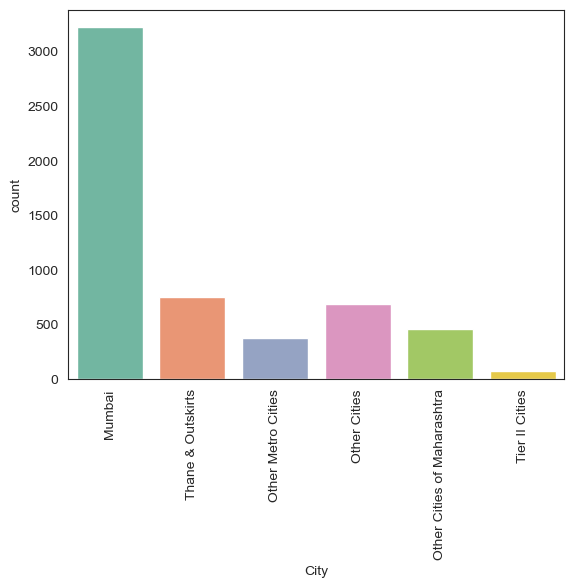

In [23]:
ax = sns.countplot(lead['City'],palette = 'Set2')
plt.xticks(rotation = 90)
plt.show()

 As there is almost 40% unknown values, we cannot impute with mode as it is make the whole data skewed. Also, X-Education is online teaching platform. The city information will not be much useful as potential students can available any courses online despite their city. We will drop the column from analysis. 

In [24]:
lead.drop("City",axis=1, inplace = True)
len(lead.columns)

20

Specialization

In [25]:
lead['Specialization'].value_counts(normalize = True)*100

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: Specialization, dtype: float64

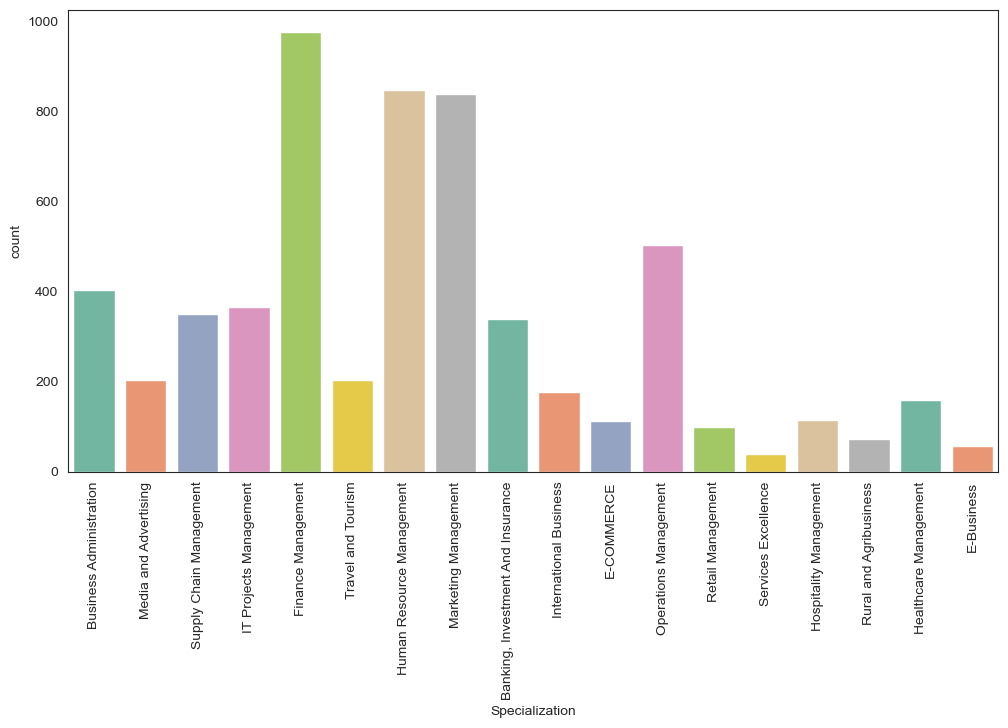

In [26]:
plt.figure(figsize=(12,6))
ax = sns.countplot(lead['Specialization'],palette = 'Set2')
plt.xticks(rotation = 90)
plt.show()

It may be possible that the lead has no specialization or may be a student and has no work experience yet , thus he/she has not entered any value. We will create a new category called 'Others' to replace the null values.

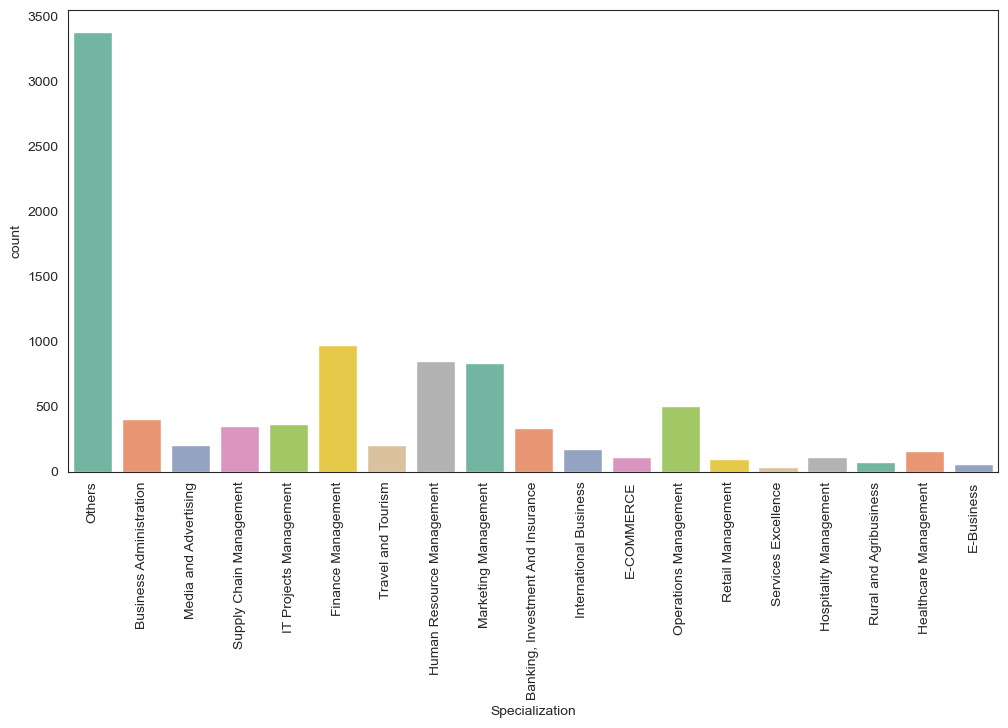

In [27]:
lead['Specialization'] = lead['Specialization'].replace(np.nan, 'Others')
plt.figure(figsize=(12,6))
ax = sns.countplot(lead['Specialization'],palette = 'Set2')
plt.xticks(rotation = 90)
plt.show()

What matters most to you in choosing a course


In [28]:
lead['What matters most to you in choosing a course'].value_counts(normalize = True)*100

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64

As the data is skewed, we can delete the column.

In [29]:
lead.drop('What matters most to you in choosing a course', axis = 1, inplace=True)
len(lead.columns)

19

What is your current occupation


In [30]:
lead['What is your current occupation'].value_counts(normalize=True)*100

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

85.5% values are "Unemployed". If we impute the data as "Unemployed" then data will become more skewed. Thus, we will impute the value as "Unknown".


In [31]:
#lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan, 'Unemployed')
lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan, 'Unknown')
lead['What is your current occupation'].value_counts(normalize = True)*100

Unemployed              60.606061
Unknown                 29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

Country

In [32]:
#Let's check how is the Country data 
lead['Country'].value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
China                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Bangladesh              0.000295
Italy                   0.000295
Belgium                 0.000295
Netherlands             0.000295
Ghana                   0.000295
Philippines             0.000295
Russia                  0.000148
Switzerland             0.000148
Vietnam   

Country data is heavily skewed as 95% of the data is mapped as India. Similar to City, Country data is not required for Model building as X-Education is online platform. We will drop the country columns too. 

In [33]:
lead.drop('Country', axis = 1, inplace = True)
len(lead.columns)

18

Last Activity

In [34]:
lead['Last Activity'].isnull().sum()
round(lead['Last Activity'].isnull().sum()/lead.shape[0]*100,2)

1.11

In [35]:
lead['Last Activity'].value_counts(normalize = True)*100

Email Opened                    37.616285
SMS Sent                        30.042684
Olark Chat Conversation         10.649010
Page Visited on Website          7.004487
Converted to Lead                4.684251
Email Bounced                    3.567911
Email Link Clicked               2.922185
Form Submitted on Website        1.269563
Unreachable                      1.017840
Unsubscribed                     0.667615
Had a Phone Conversation         0.328335
Approached upfront               0.098501
View in browser link Clicked     0.065667
Email Received                   0.021889
Email Marked Spam                0.021889
Visited Booth in Tradeshow       0.010945
Resubscribed to emails           0.010945
Name: Last Activity, dtype: float64

As we are unsure what could be the Last activity, we will replace it with the most frequent activity "Email Opened".

In [36]:
lead['Last Activity'] = lead['Last Activity'].replace(np.nan, 'Email Opened')
lead['Last Activity'].isnull().sum()

0

**Lead Source**

In [37]:
lead['Lead Source'].isnull().sum()
round(lead['Lead Source'].isnull().sum()/lead.shape[0]*100,2)

0.39

In [38]:
lead['Lead Source'].value_counts(normalize = True)*100

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Press_Release         0.021730
Social Media          0.021730
Live Chat             0.021730
youtubechannel        0.010865
testone               0.010865
Pay per Click Ads     0.010865
welearnblog_Home      0.010865
WeLearn               0.010865
blog                  0.010865
NC_EDM                0.010865
Name: Lead Source, dtype: float64

As Google seems to be most used Lead Source, we will replace null values with Google. There is a category 'google' which is same as 'Google' We will replace the values

In [39]:
lead['Lead Source'] = lead['Lead Source'].replace(np.nan, 'Google')
lead['Lead Source'] = lead['Lead Source'].replace(['google'], 'Google')
lead['Lead Source'].isnull().sum()

0

Numerical Columns Null Value Treatment

In [40]:
# Checking unique values and null values for the categorical columns
def Num_info(df, numeric_column):
    df_result = pd.DataFrame(columns=["columns","null_values","null_percent"])
    
    df_temp=pd.DataFrame()
    for value in numeric_column:
        df_temp["columns"] = [value]
        df_temp["null_values"] = df[value].isna().sum()
        df_temp["null_percent"] = (df[value].isna().sum()/len(df)*100).round(1)
        df_result = df_result.append(df_temp)
    
    df_result.sort_values("null_values", ascending =False, inplace=True)
    df_result.set_index("columns", inplace=True)
    return df_result

In [41]:
df_num = Num_info(lead,numerical_col)
df_num

,null_values,null_percent
columns,,
TotalVisits,137,1.5
Page Views Per Visit,137,1.5
Converted,0,0.0
Total Time Spent on Website,0,0.0


Total Visits

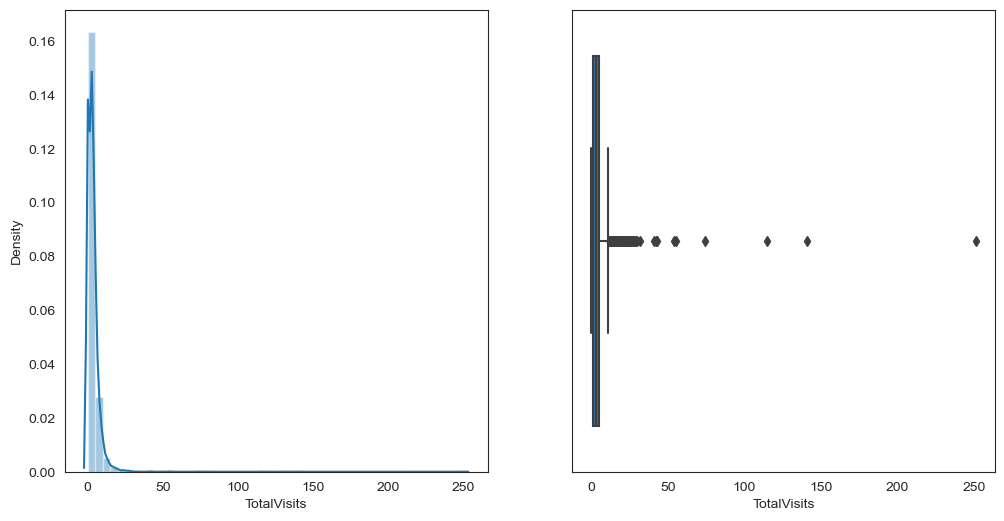

In [42]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.distplot(lead['TotalVisits'])
plt.subplot(1,2,2)
sns.boxplot(lead['TotalVisits'])
plt.show()

As we see there are some outliers in the data, we will impute with median and not mean value. 

In [43]:
lead['TotalVisits'].fillna(lead['TotalVisits'].median(), inplace=True)
lead['TotalVisits'].isnull().sum()

0

Page Views Per Visit

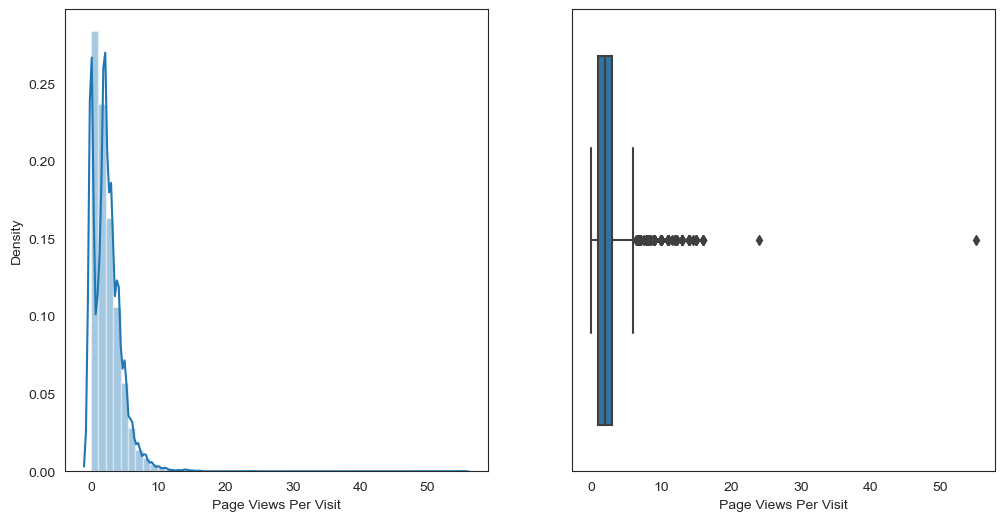

In [44]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.distplot(lead['Page Views Per Visit'])
plt.subplot(1,2,2)
sns.boxplot(lead['Page Views Per Visit'])
plt.show()

As we see there are some outliers in the data, we will impute with median and not mean value. 

In [45]:
lead['Page Views Per Visit'].fillna(lead['Page Views Per Visit'].median(), inplace=True)
lead['Page Views Per Visit'].isnull().sum()

0

**Exploratory Data Analysis**

 Data Imbalance
         

In [46]:
converted = lead['Converted'].value_counts().rename_axis('unique_values').to_frame('counts')
converted

,counts
unique_values,
0,5679
1,3561


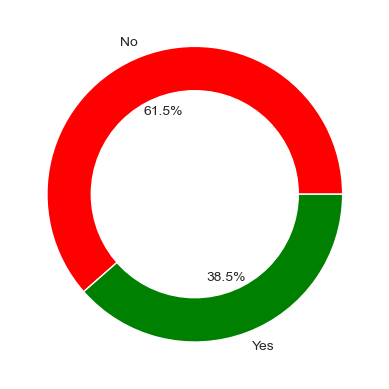

In [47]:

my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(converted.counts, labels = ['No','Yes'],colors = ['red','green'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


In the lead conversion ration, 38.5% has converted to leads where as 61.5% did not convert to a lead. So it seems like a balanced dataset. 


# Graph Functions

In [48]:
# function for plotting repetitive countplots in univariate categorical analysis on the lead dataset
# This function will create two subplots: 
# 1. Count plot of categorical column w.r.t Converted; 
# 2. Percentage of converted leads within column

def univariate_categorical(feature,label_rotation=False,horizontal_layout=True):
    temp_count = lead[feature].value_counts()
    temp_perc = lead[feature].value_counts(normalize = True)
    df1 = pd.DataFrame({feature: temp_count.index,'Total Leads': temp_count.values,'% Values': temp_perc.values * 100})
    print(df1)
    
    # Calculate the percentage of Converted=1 per category value
    cat_perc = lead[[feature, 'Converted']].groupby([feature],as_index=False).mean()
    cat_perc["Converted"] = cat_perc["Converted"]*100
    cat_perc.sort_values(by='Converted', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,24))   
    # 1. Subplot 1: Count plot of categorical column
    sns.set_palette("Set2")
    s = sns.countplot(ax=ax1, 
                    x = feature, 
                    data=lead,
                    hue ="Converted",
                    order=cat_perc[feature],
                    palette=['r','g'])

    # Define common styling
    ax1.set_title(feature, fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    ax1.legend(['Not Converted','Converted'])
    
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    # 2. Subplot 2: Percentage of defaulters within the categorical column
    s = sns.barplot(ax=ax2, 
                    x = feature, 
                    y='Converted', 
                    order=cat_perc[feature], 
                    data=cat_perc,
                    palette='Set2')
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of Converted leads [%]', fontsize=15)
    plt.xlabel(feature,fontsize=15) 
    plt.tick_params(axis='both', which='major', labelsize=10)
    ax2.set_title(feature + "( Converted % )", fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 

    plt.show();

Most of the features in the dataset are categorical. Let us begin our analysis by performing segmented univariate analysis on each categorical feature. We will view bar plots that will show the total count of converted and non-converted leads in every category.

In [49]:
lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview'],
      dtype='object')

In [50]:
# Renaming some of the column headers which has long header

lead.rename(columns={'What is your current occupation': 'Occupation', 
                     'Through Recommendations': 'Recommendation',
                     'A free copy of Mastering The Interview': 'Free Copy'                   
                    },inplace = True)
lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization', 'Occupation',
       'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Recommendation', 'Free Copy'],
      dtype='object')

# **Univariate Analysis - Categorical**
#          

Lead Origin

               Lead Origin  Total Leads   % Values
0  Landing Page Submission         4886  52.878788
1                      API         3580  38.744589
2            Lead Add Form          718   7.770563
3              Lead Import           55   0.595238
4           Quick Add Form            1   0.010823


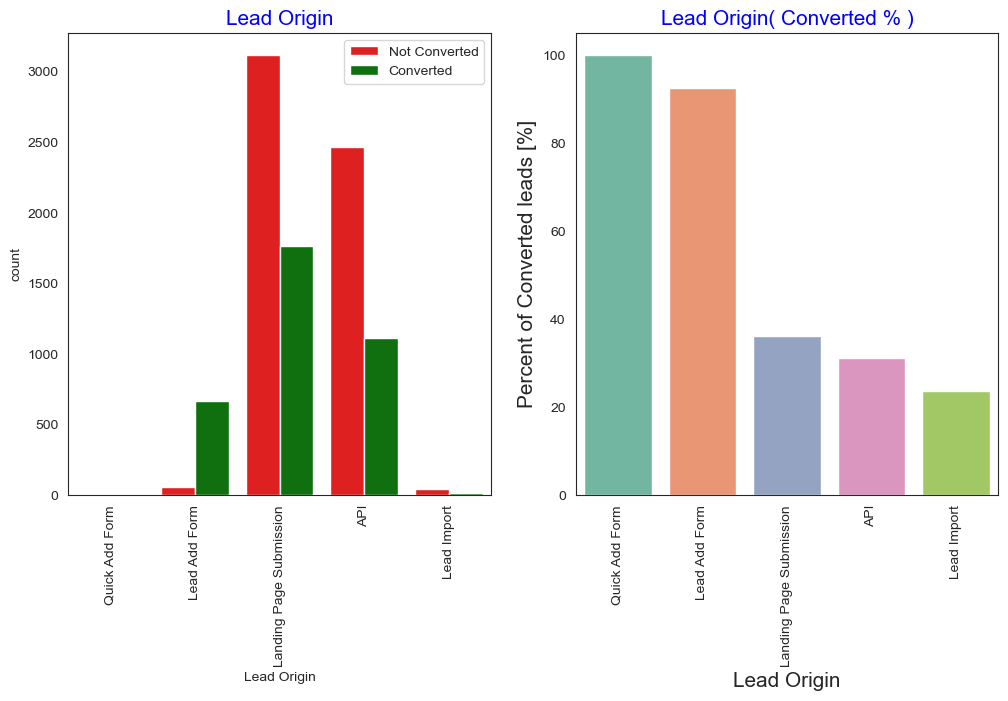

In [51]:
#Run the function to get plot categorical plots 
univariate_categorical("Lead Origin",label_rotation=True)

Most Leads originated from submissions on the landing page and around 38% of those are converted followed by API, where around 30% are converted.
Even though Lead Origins from Quick Add Form are 100% Converted, there was just 1 lead from that category. Leads from the Lead Add Form are the next highest conversions in this category at around 90% of 718 leads.Lead Import are very less in count and conversion rate is also the lowestTo improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

Lead Source

          Lead Source  Total Leads   % Values
0              Google         2909  31.482684
1      Direct Traffic         2543  27.521645
2          Olark Chat         1755  18.993506
3      Organic Search         1154  12.489177
4           Reference          534   5.779221
5    Welingak Website          142   1.536797
6      Referral Sites          125   1.352814
7            Facebook           55   0.595238
8                bing            6   0.064935
9          Click2call            4   0.043290
10       Social Media            2   0.021645
11          Live Chat            2   0.021645
12      Press_Release            2   0.021645
13  Pay per Click Ads            1   0.010823
14               blog            1   0.010823
15            WeLearn            1   0.010823
16   welearnblog_Home            1   0.010823
17     youtubechannel            1   0.010823
18            testone            1   0.010823
19             NC_EDM            1   0.010823


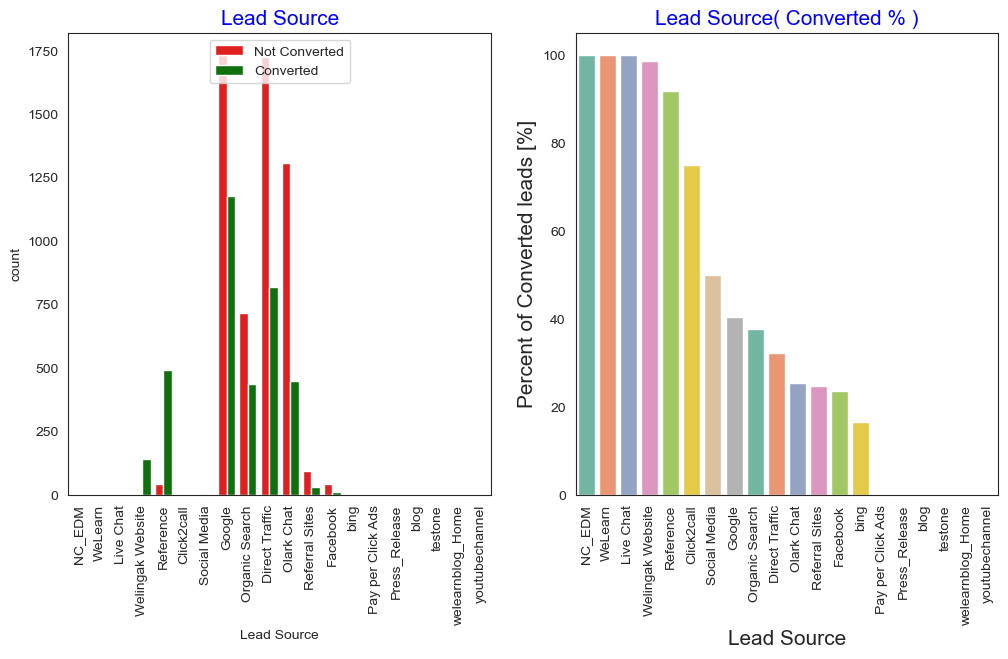

In [52]:
#Run the function to get plot categorical plots
univariate_categorical("Lead Source",label_rotation=True)


We will combine smaller lead sources as 'Other Sources'. 
 

In [53]:
lead['Lead Source'] = lead['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Other Sources')

        Lead Source  Total Leads   % Values
0            Google         2909  31.482684
1    Direct Traffic         2543  27.521645
2        Olark Chat         1755  18.993506
3    Organic Search         1154  12.489177
4         Reference          534   5.779221
5  Welingak Website          142   1.536797
6    Referral Sites          125   1.352814
7          Facebook           55   0.595238
8     Other Sources           23   0.248918


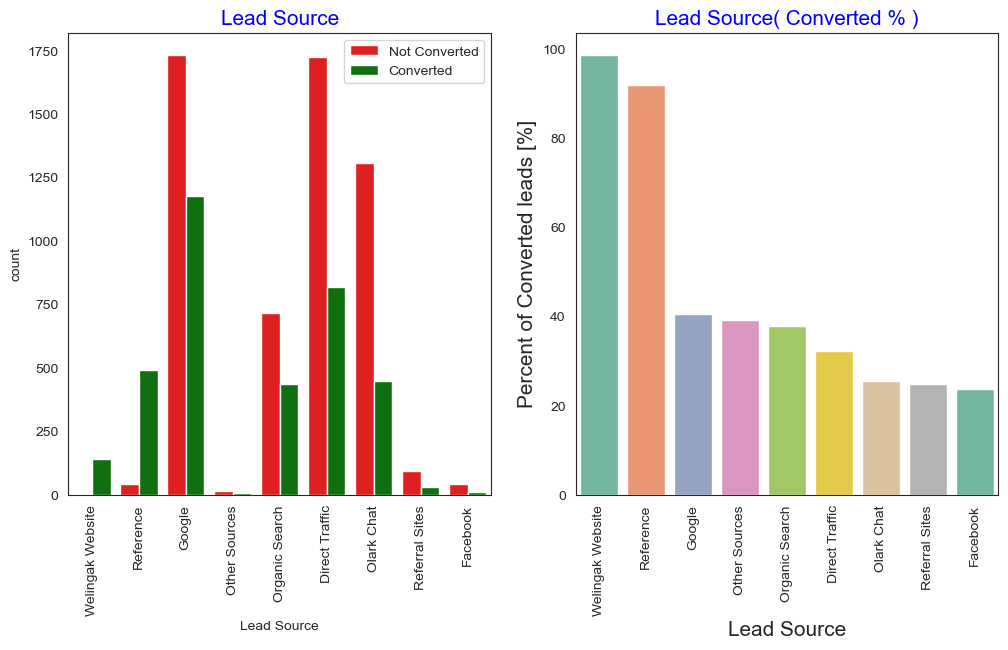

In [54]:
#Running the function again to check the updated statistics
univariate_categorical("Lead Source",label_rotation=True)

The source of most leads was Google, and 40% of the leads converted, followed by Direct Traffic,Organic search and Olark chat where around 35%, 38% and 30% converted respectively.A lead that came from a reference has over 90% conversion from the total of 534. Welingak Website has almost 100% lead conversion rate. This option should be explored more to increase lead conversionTo increase lead count, initiatives should be taken so already exitsing members increase their referrals.

**Do not Email**
           

  Do Not Email  Total Leads   % Values
0           No         8506  92.056277
1          Yes          734   7.943723


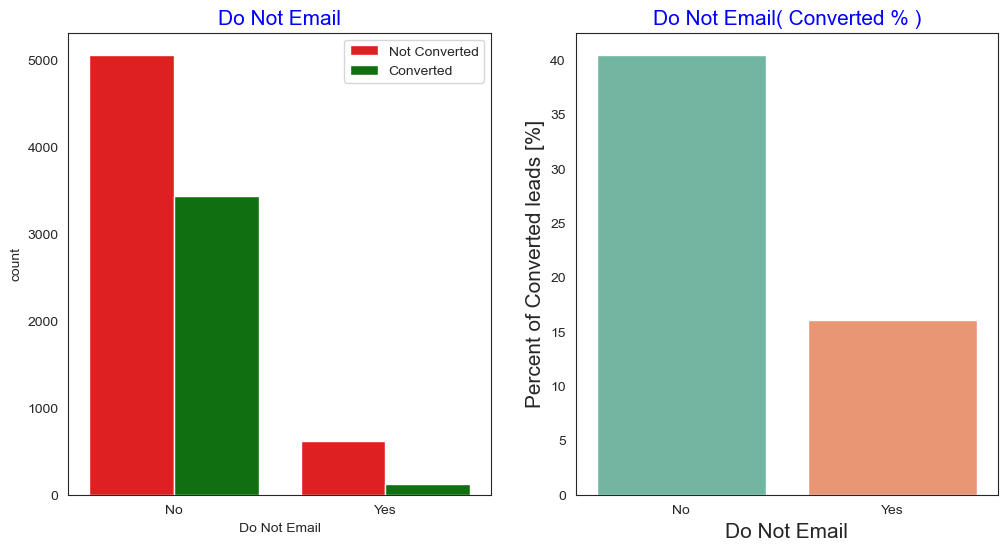

In [55]:
#Run the function to get plot categorical plots
univariate_categorical("Do Not Email")

 Majority of the people are ok with receiving email (~92%).
 People who are ok with email has conversion rate of 40%.
 People who have opted out of receive email has lower rate of conversion (only 15%)

Last Activity

                   Last Activity  Total Leads   % Values
0                   Email Opened         3540  38.311688
1                       SMS Sent         2745  29.707792
2        Olark Chat Conversation          973  10.530303
3        Page Visited on Website          640   6.926407
4              Converted to Lead          428   4.632035
5                  Email Bounced          326   3.528139
6             Email Link Clicked          267   2.889610
7      Form Submitted on Website          116   1.255411
8                    Unreachable           93   1.006494
9                   Unsubscribed           61   0.660173
10      Had a Phone Conversation           30   0.324675
11            Approached upfront            9   0.097403
12  View in browser link Clicked            6   0.064935
13                Email Received            2   0.021645
14             Email Marked Spam            2   0.021645
15    Visited Booth in Tradeshow            1   0.010823
16        Resubscribed to email

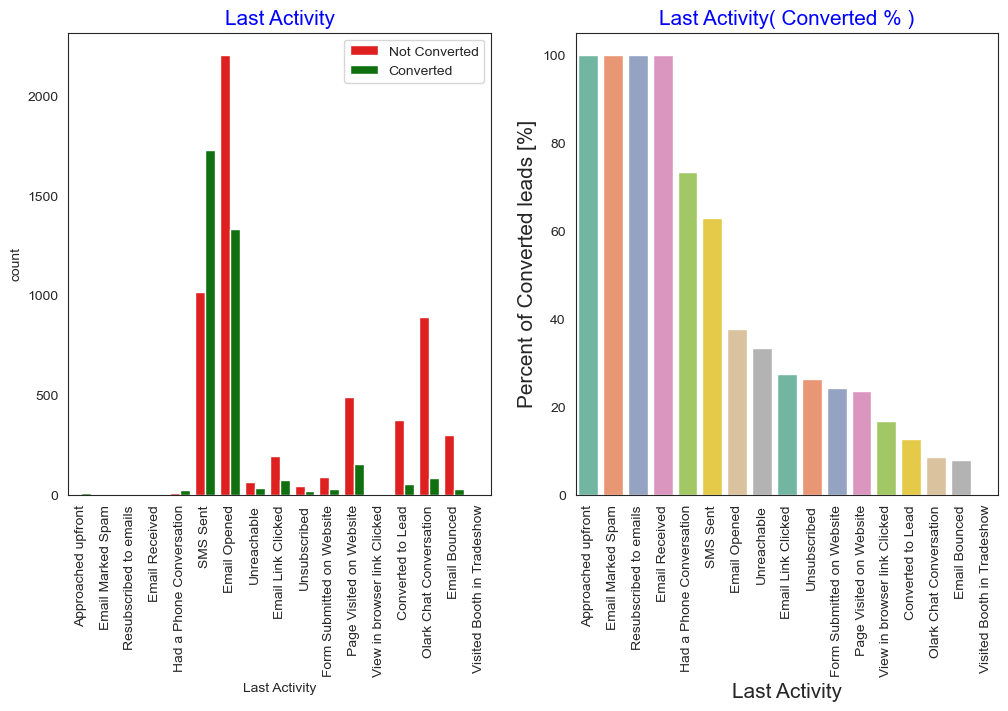

In [56]:
#Run the function to get plot categorical plots
univariate_categorical("Last Activity",label_rotation=True)

We will combine smaller Last Activity values as 'Other Activity'. 


In [57]:
# Let's keep considerable last activities as such and club all others to "Other_Activity"
lead['Last Activity'] = lead['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other Activity')

                Last Activity  Total Leads   % Values
0                Email Opened         3540  38.311688
1                    SMS Sent         2745  29.707792
2     Olark Chat Conversation          973  10.530303
3     Page Visited on Website          640   6.926407
4           Converted to Lead          428   4.632035
5               Email Bounced          326   3.528139
6          Email Link Clicked          267   2.889610
7   Form Submitted on Website          116   1.255411
8                 Unreachable           93   1.006494
9                Unsubscribed           61   0.660173
10             Other Activity           51   0.551948


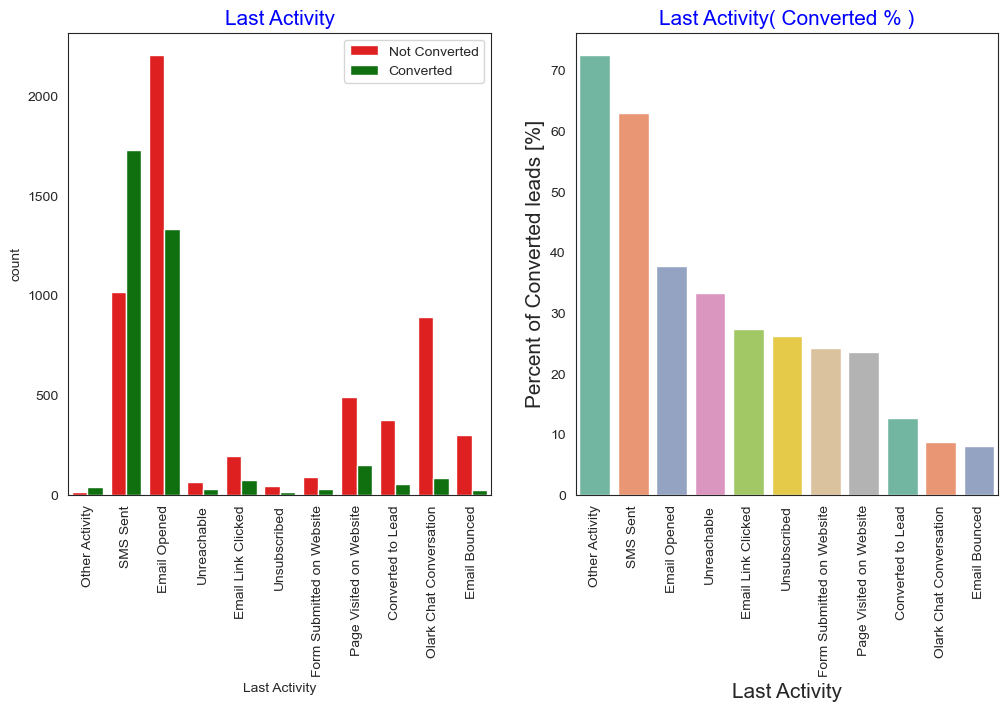

In [58]:
#Run the function to get plot categorical plots
univariate_categorical("Last Activity",label_rotation=True)

Most of the lead have their Email opened as their last activityAfter combining smaller Last Activity types as Other Activity, the lead conversion is very high (~70%) Conversion rate for leads with last activity as SMS Sent is almost 60%
        

 Specialization

                       Specialization  Total Leads   % Values
0                              Others         3380  36.580087
1                  Finance Management          976  10.562771
2           Human Resource Management          848   9.177489
3                Marketing Management          838   9.069264
4               Operations Management          503   5.443723
5             Business Administration          403   4.361472
6              IT Projects Management          366   3.961039
7             Supply Chain Management          349   3.777056
8   Banking, Investment And Insurance          338   3.658009
9                  Travel and Tourism          203   2.196970
10              Media and Advertising          203   2.196970
11             International Business          178   1.926407
12              Healthcare Management          159   1.720779
13             Hospitality Management          114   1.233766
14                         E-COMMERCE          112   1.212121
15      

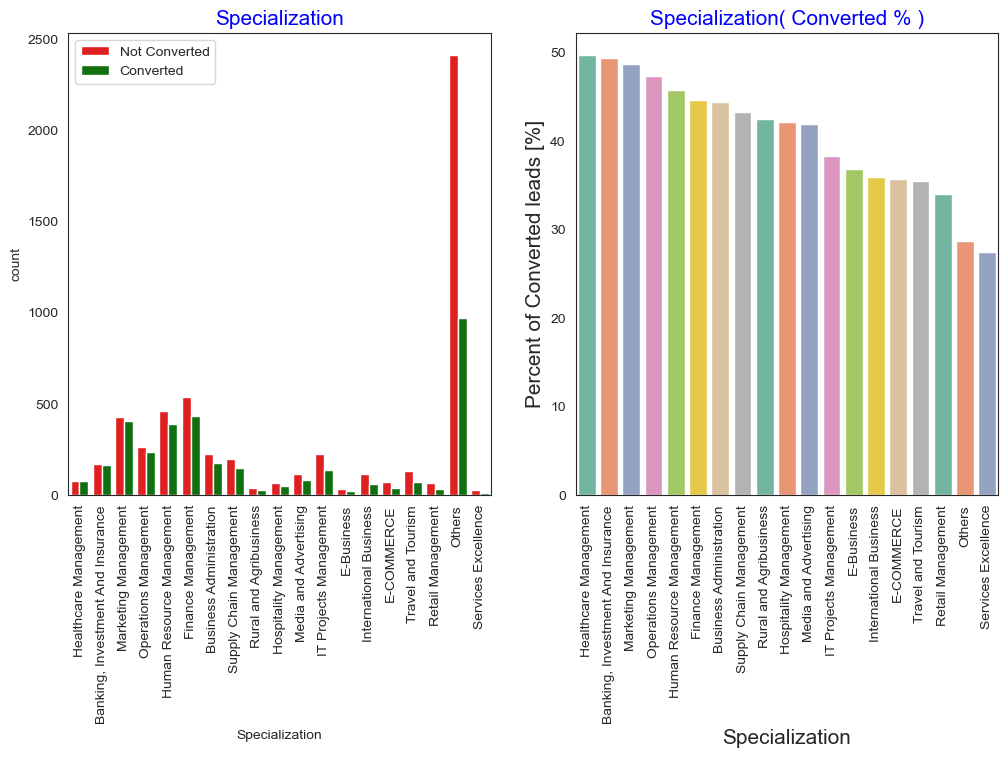

In [59]:
#Run the function to get plot categorical plots
univariate_categorical("Specialization",label_rotation=True)

Most of the leads have not mentioned a specialization and around 28% of those convertedLeads with Finance management and Marketing Management - Over 45% Converted 

Occupation

             Occupation  Total Leads   % Values
0            Unemployed         5600  60.606061
1               Unknown         2690  29.112554
2  Working Professional          706   7.640693
3               Student          210   2.272727
4                 Other           16   0.173160
5             Housewife           10   0.108225
6           Businessman            8   0.086580


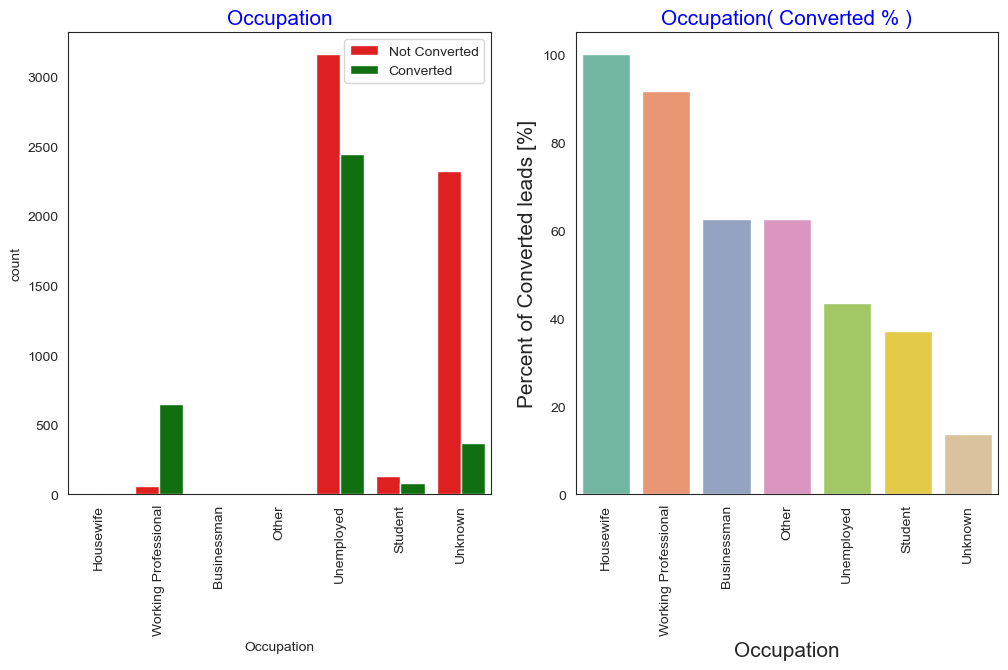

In [60]:
#Run the function to get plot categorical plots
univariate_categorical("Occupation",label_rotation=True)

Though Housewives are less in numbers, they have 100% conversion rate  Working professionals, Businessmen and Other category have high conversion rate Though Unemployed people have been contacted in the highest number, the conversion rate is low (~40%) We cannot combine smalled value categories as their conversion rate is very different. Combing them may provide wrong predictions.

**Search, Newspaper, Newspaper Article, Digital Advertisement, ,X Education Forums, Free Copy**
            

The following features have two categories only. We are going to evaluate the skewness of the data and decide whether to exclude them from model building.

In [61]:
def pieplot(col):
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    converted = lead[col].value_counts().rename_axis('unique_values').to_frame('counts')
    plt.pie(converted.counts, labels = ["No","Yes"],colors = ['red','green'],autopct='%1.1f%%')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.title(col)

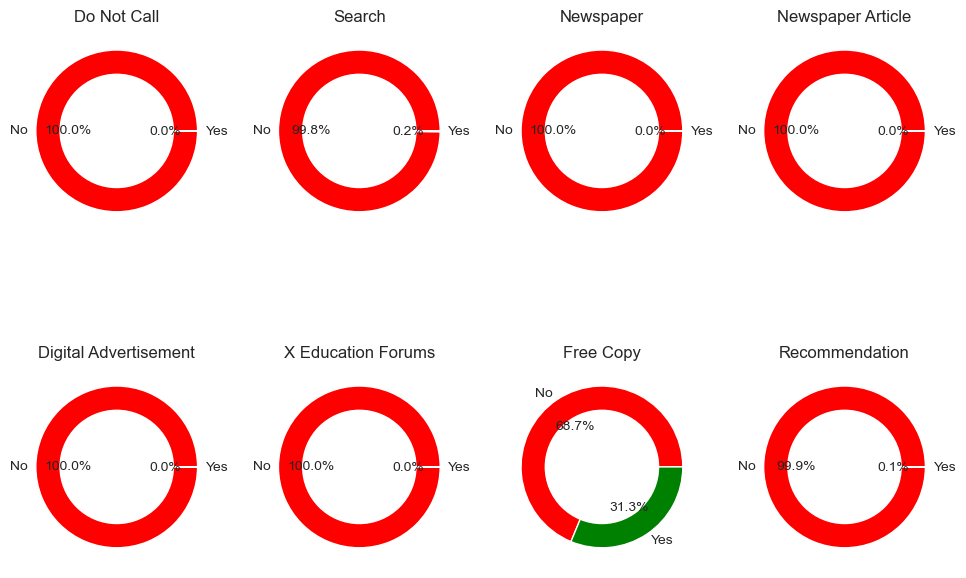

In [62]:
# Lets lookinto the data distribution of the following columns
col = ['Do Not Call','Search', 'Newspaper', 'Newspaper Article', 'Digital Advertisement', 'X Education Forums', 'Free Copy','Recommendation']
plt.figure(figsize = (12,8))
i=1
for each_col in col:
    plt.subplot(2,4,i)
    pieplot(each_col)
    i+=1

  Free Copy  Total Leads   % Values
0        No         6352  68.744589
1       Yes         2888  31.255411


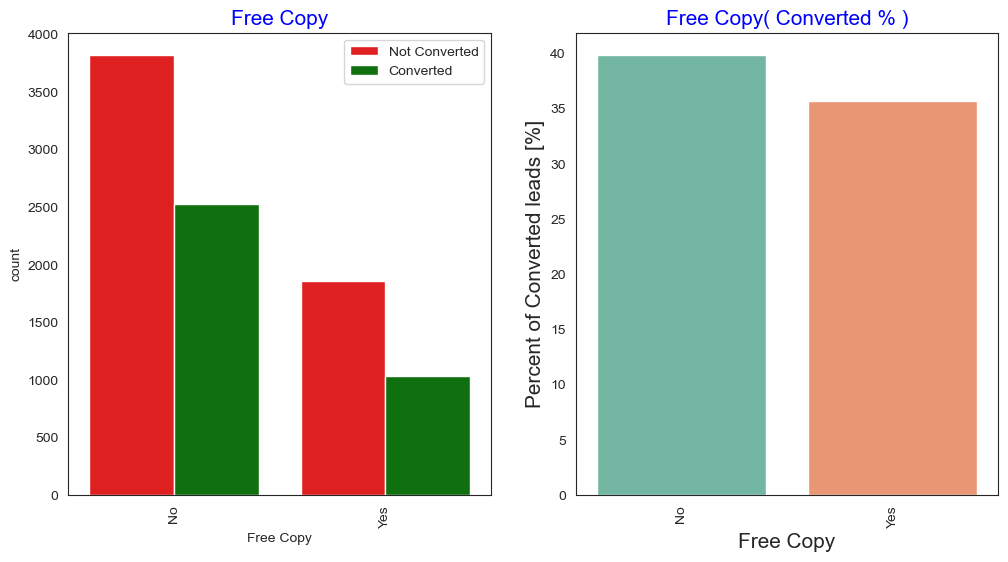

In [63]:
#Run the function to get plot categorical plots
univariate_categorical("Free Copy",label_rotation=True)

Search, Newspaper, Newspaper Article, Digital Advertisement, ,X Education Forums, Recommendation data are very skewed and can be deleted as they will not add any value to the model. Distributing Free-Copy of Mastering Interview doesn't seem to add much value as the coenversion rate is almost same. We will drop all these columns.
   

In [64]:
lead.drop(col,axis = 1, inplace = True)
len(lead.columns)

10

#  Univariate Analysis - Numerical

In [65]:
lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'Occupation'],
      dtype='object')

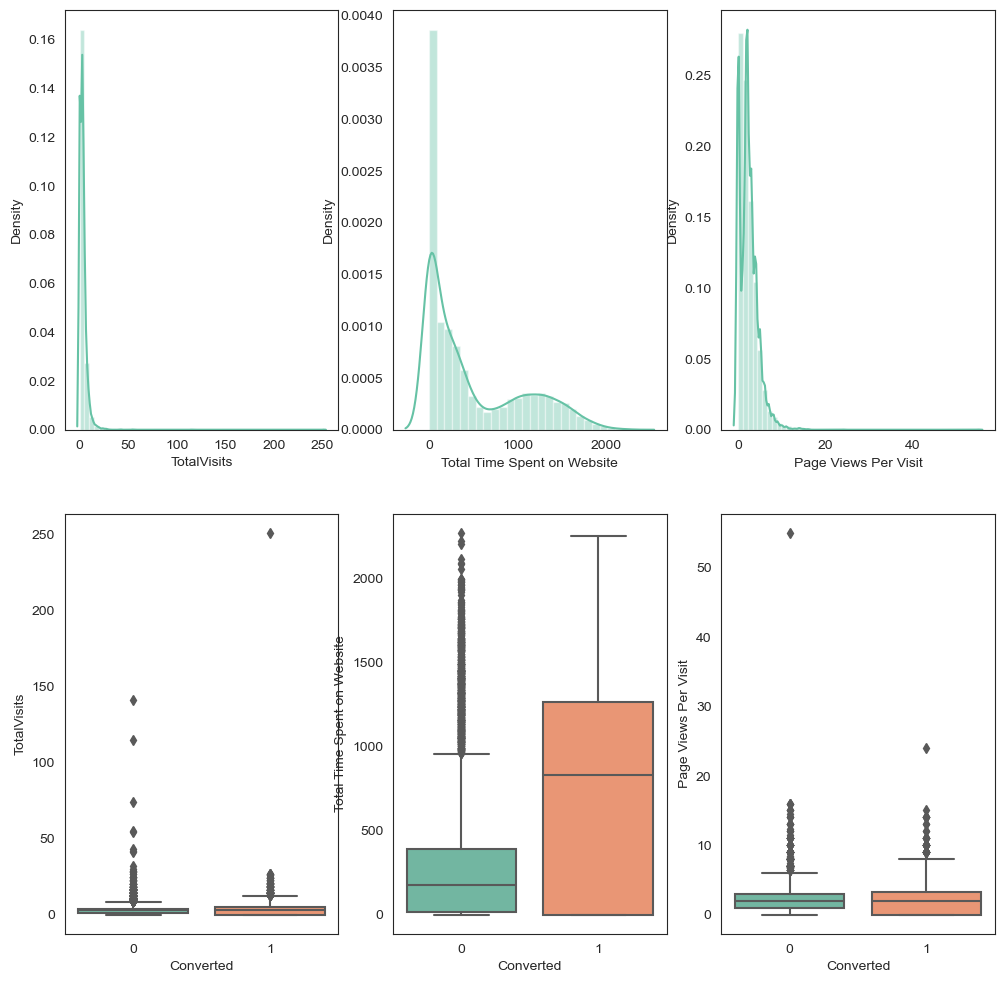

In [66]:
numerical_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
plt.figure(figsize=(12,12))

i=1
for col in numerical_cols:
    plt.subplot(2,3,i)
    sns.distplot(lead[col])
    plt.subplot(2,3,3+i)
    sns.boxplot(y=lead[col], x = lead['Converted'])
    i+=1

TotalVisits and Page Views per Visit has some outliers which needs to be treated.


# Bivariate Analysis

<Figure size 2000x2000 with 0 Axes>

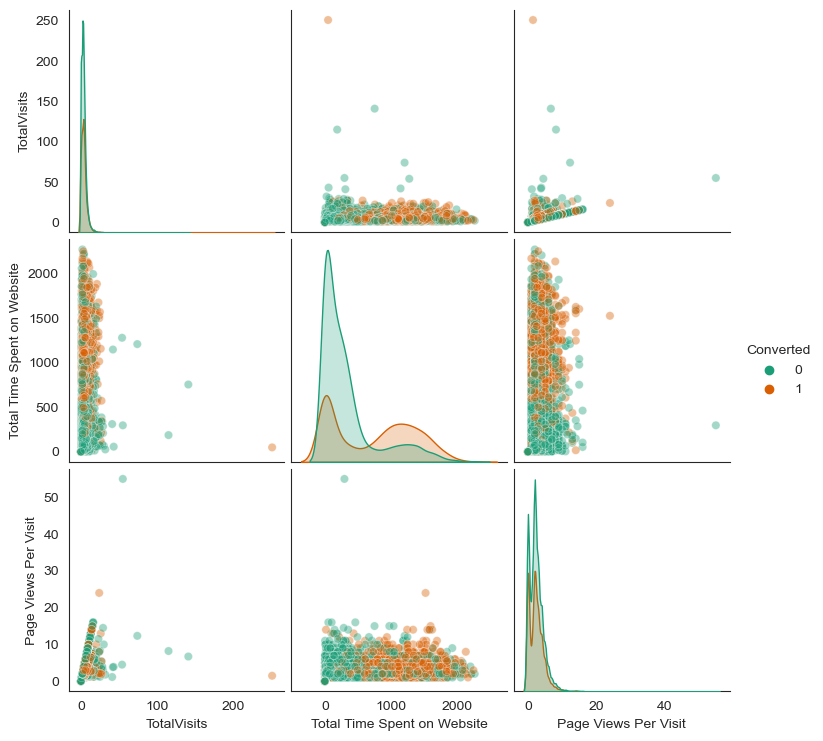

In [67]:
plt.figure(figsize =(20,20))
sns.pairplot(lead[numerical_col],hue="Converted",kind='scatter', plot_kws={'alpha':0.4},palette = 'Dark2')                                  
plt.show()

Data is not normally distributed.  
   

# Data Preparation

**Outliers Treatment**'

In [68]:
#Checking the detailed percentile values
lead.describe(percentiles=[.1,.5,.25,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440
std,0.486714,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
90%,1.000000,7.000000,1380.000000,5.000000
95%,1.000000,10.000000,1562.000000,6.000000


In [69]:
numerical_col

array(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'], dtype=object)

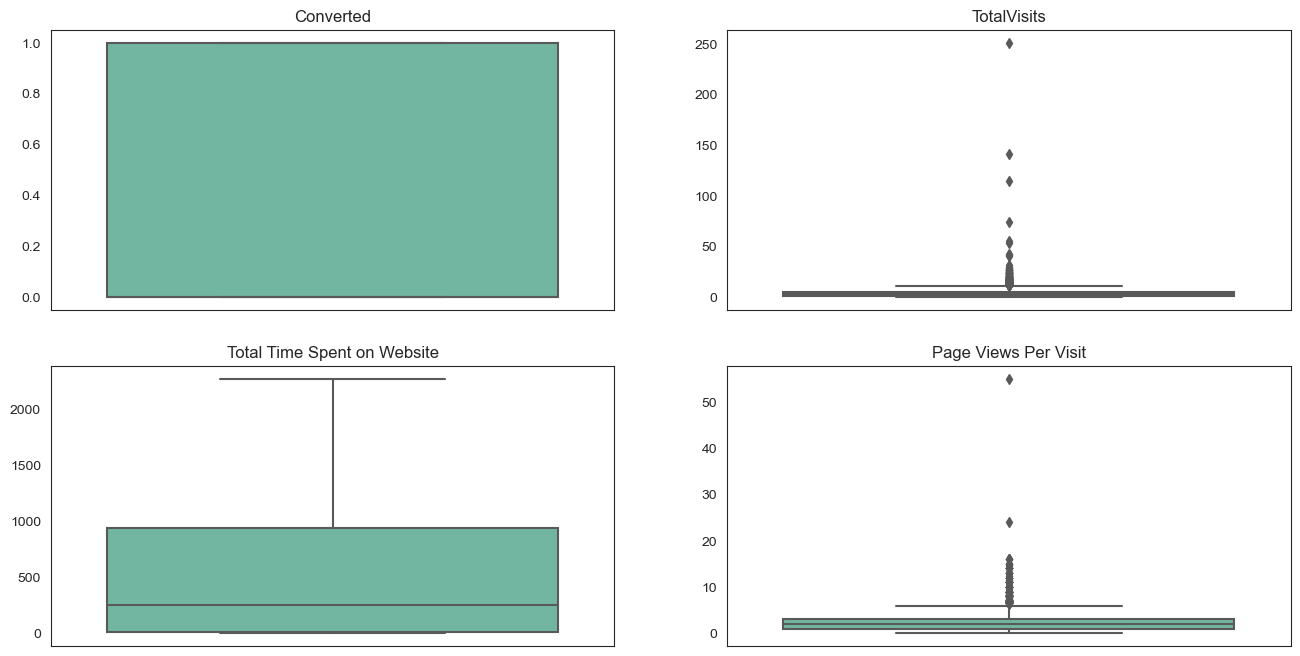

In [70]:
#Plotting the numerical columns for outlier values
i=1
plt.figure(figsize=[16,8])
for col in numerical_col:
    plt.subplot(2,2,i)
    sns.boxplot(y=lead[col])
    plt.title(col)
    plt.ylabel('')
    i+=1

Though outliers in TotalVisits and Page Views Per Visit shows valid values, this will misclassify the outcomes and consequently create problems when making inferences with the wrong model. Logistic Regression is heavily influenced by outliers. So lets cap the TotalVisits and Page Views Per Visit to their 95 th percentile due to following reasons: 
    Data set is fairly high number95th percentile and 99th percentile of these columns are very close and hence impact of capping to 95th or 99th percentile will be the same

In [71]:
#Capping the data at 95% percetile value
Q4 = lead['TotalVisits'].quantile(0.95) # Get 95th quantile
print("Total number of rows getting capped for TotalVisits column : ",len(lead[lead['TotalVisits'] >= Q4]))
lead.loc[lead['TotalVisits'] >= Q4, 'TotalVisits'] = Q4 # outlier capping

Q4 = lead['Page Views Per Visit'].quantile(0.95) # Get 95th quantile
print("Total number of rows getting capped for Page Views Per Visit column : ",len(lead[lead['Page Views Per Visit'] >= Q4]))
lead.loc[lead['Page Views Per Visit'] >= Q4, 'Page Views Per Visit'] = Q4 # outlier capping

Total number of rows getting capped for TotalVisits column :  467
Total number of rows getting capped for Page Views Per Visit column :  604


The number of rows getting capped are quite high. This is also the reason that we are capping the data instead of deleting it.  
 

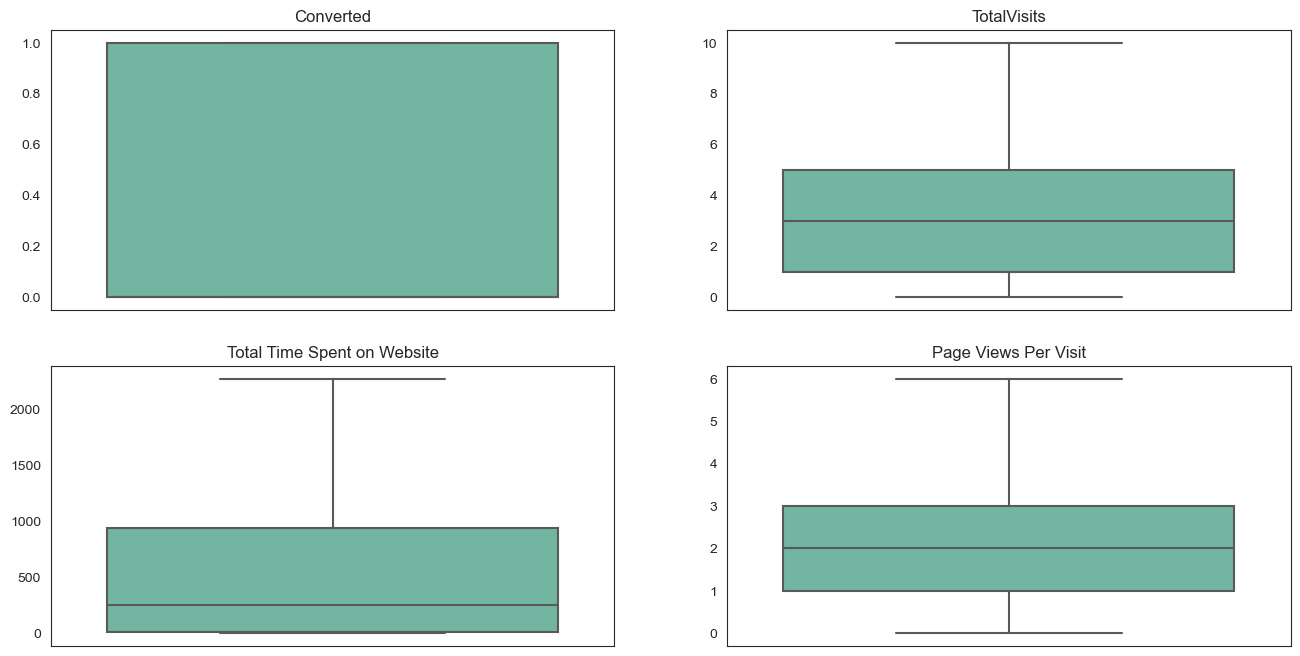

In [72]:
#replotting the graphs to check for outlier treatment
i=1
plt.figure(figsize=[16,8])
for col in numerical_col:
    plt.subplot(2,2,i)
    sns.boxplot(y=lead[col])
    plt.title(col)
    plt.ylabel('')
    i+=1

In [73]:
# Checking the percentile values again 
lead.describe(percentiles=[.1,.5,.25,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.179221,487.698268,2.255105
std,0.486714,2.761219,548.021466,1.779471
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
90%,1.000000,7.000000,1380.000000,5.000000
95%,1.000000,10.000000,1562.000000,6.000000


Now that we have capped the outliers, let's proceed to data preparation for model building. 

# Convert Binary Categories

In [74]:
# Checking the unique value counts for categorcial columns
lead.nunique().sort_values()

Do Not Email                      2
Converted                         2
Lead Origin                       5
Occupation                        7
Lead Source                       9
TotalVisits                      11
Last Activity                    11
Specialization                   19
Page Views Per Visit             91
Total Time Spent on Website    1731
dtype: int64

In [75]:
# Checking the categorical values for 'Do Not Email' feature
lead['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [76]:
# List of variables to map

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the lead YES/NO variable list
lead['Do Not Email'] = lead[['Do Not Email']].apply(binary_map)

In [77]:
# rechecking the categorical values for 'Do Not Email' feature
lead['Do Not Email'].value_counts()

0    8506
1     734
Name: Do Not Email, dtype: int64

# Dummy Variables

In [78]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Occupation', 'Last Activity', 'Specialization']], drop_first=True)

# Adding the results to the master dataframe
lead = pd.concat([lead, dummy1], axis=1)

lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Occupation,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,...,0,0,0,0,1,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,...,0,0,0,0,1,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,...,0,0,0,0,1,0,0,0,0,0


In [79]:
# We have created dummies for the below variables, so we can drop them
lead = lead.drop(['Lead Origin', 'Lead Source', 'Occupation', 'Last Activity', 'Specialization'], axis=1)
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 51 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              9240 non-null   int64  
 1   Converted                                 9240 non-null   int64  
 2   TotalVisits                               9240 non-null   float64
 3   Total Time Spent on Website               9240 non-null   int64  
 4   Page Views Per Visit                      9240 non-null   float64
 5   Lead Origin_Landing Page Submission       9240 non-null   uint8  
 6   Lead Origin_Lead Add Form                 9240 non-null   uint8  
 7   Lead Origin_Lead Import                   9240 non-null   uint8  
 8   Lead Origin_Quick Add Form                9240 non-null   uint8  
 9   Lead Source_Facebook                      9240 non-null   uint8  
 10  Lead Source_Google                  

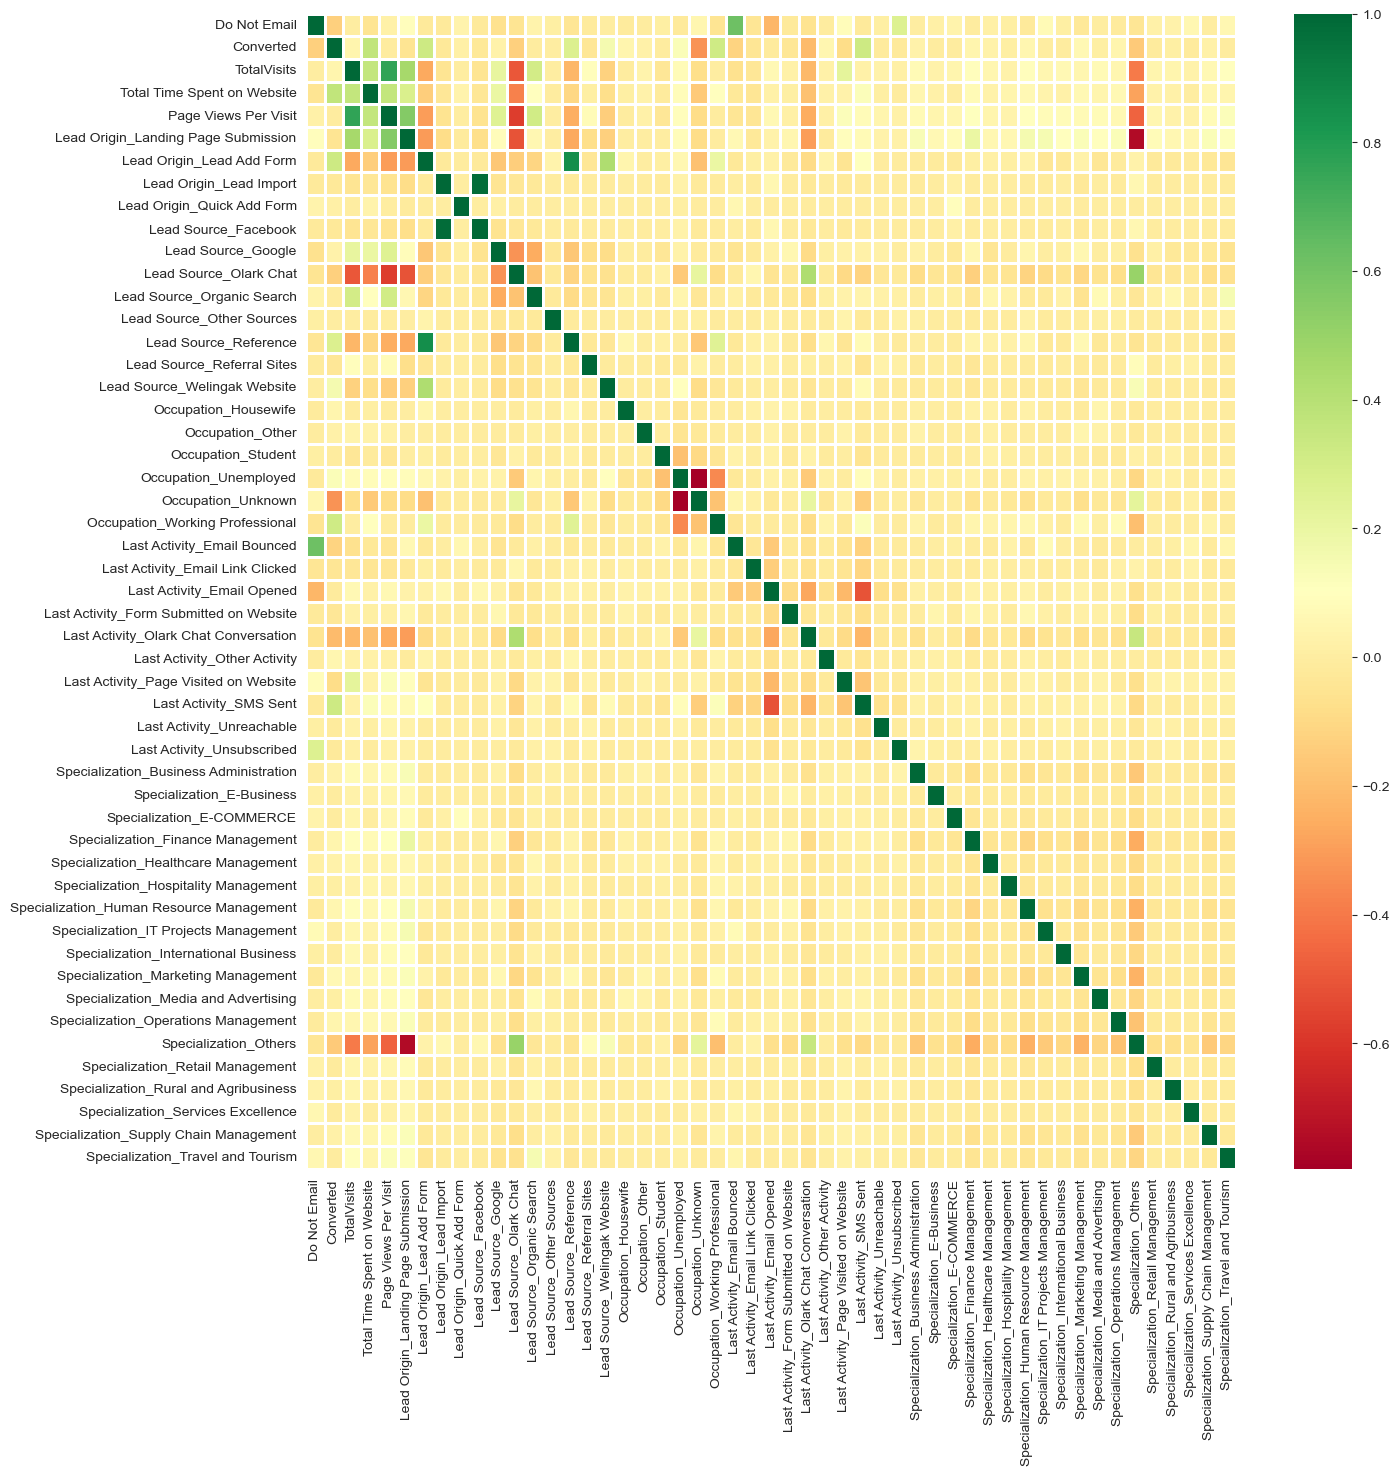

In [80]:
# Visualizing the data using heatmap
plt.figure(figsize=[15,15])
sns.heatmap(lead.corr(), cmap="RdYlGn",linewidth =1)
plt.show()

In [81]:
print('Total number of columns after One-Hot Encoding : ',len(lead.columns))

Total number of columns after One-Hot Encoding :  51


There are 51 columns in Heatmap which makes it difficult to interpret. Let's review top 5 positively and negatively correlated features.
   

In [82]:
corr_lead = lead.corr()
corr_lead = corr_lead.where(np.triu(np.ones(corr_lead.shape),k=1).astype(np.bool))
corr_df = corr_lead.unstack().reset_index()
corr_df.columns =['VAR1','VAR2','Correlation']
corr_df.dropna(subset = ["Correlation"], inplace = True) 
corr_df.sort_values(by='Correlation', ascending=False, inplace=True)

# Top 5 Positive correlated variables
corr_df.head(5)

,VAR1,VAR2,Correlation
466,Lead Source_Facebook,Lead Origin_Lead Import,0.981709
720,Lead Source_Reference,Lead Origin_Lead Add Form,0.853237
206,Page Views Per Visit,TotalVisits,0.767585
1173,Last Activity_Email Bounced,Do Not Email,0.618470
259,Lead Origin_Landing Page Submission,Page Views Per Visit,0.553423


In [83]:
corr_df.sort_values(by='Correlation', ascending=True, inplace=True)

# Top 5 Negatively correlated variables
corr_df.head(5)

,VAR1,VAR2,Correlation
1091,Occupation_Unknown,Occupation_Unemployed,-0.794875
2300,Specialization_Others,Lead Origin_Landing Page Submission,-0.748263
565,Lead Source_Olark Chat,Page Views Per Visit,-0.573334
566,Lead Source_Olark Chat,Lead Origin_Landing Page Submission,-0.512950
1555,Last Activity_SMS Sent,Last Activity_Email Opened,-0.512325


# Train - Test Split

In [84]:
# target variable
Y = lead['Converted']
X = lead.drop(['Converted'], axis=1)

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

In [85]:
#Checking the shape of the created Train & Test DFs
print(" Shape of X_train is : ",X_train.shape)
print(" Shape of y_train is : ",y_train.shape)
print(" Shape of X_test is  : ",X_test.shape)
print(" Shape of y_test is  : ",y_test.shape)

 Shape of X_train is :  (6468, 50)
 Shape of y_train is :  (6468,)
 Shape of X_test is  :  (2772, 50)
 Shape of y_test is  :  (2772,)


# Feature Scaling

Feature Scaling: We standardized the numeric attributes so they have a common mean of zero, if they were measured on different scales

In [86]:
scaler = StandardScaler()

X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']] = scaler.fit_transform(X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
1871,0,-1.149699,-0.885371,-1.266675,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6795,0,0.299722,0.005716,-0.516439,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3516,0,0.662077,-0.691418,0.143543,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8105,0,0.662077,1.365219,1.553761,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3934,0,-1.149699,-0.885371,-1.266675,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Now that we have our Train and Test data bases ready and Train database standardized, let's try building some model using Logistic Regression.


# Model Building

**RFE for Feature Reduction**

In [87]:
# Using RFE to reduce the feature count from 54 to 20
logreg = LogisticRegression()
rfe = RFE(logreg, 20)           
rfe = rfe.fit(X_train, y_train)


TypeError: __init__() takes 2 positional arguments but 3 were given

In [ ]:
#checking the output of RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

In [ ]:
#checking which columns remained after RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

In [ ]:
#Columns which have been removed after RFE
X_train.columns[~rfe.support_]

In [ ]:
# Functions to repeat Logictis regression model and VIF calculation repeatedly

# function to build logistic regression model
def build_logistic_model(feature_list):
    X_train_local = X_train[feature_list] # get feature list for VIF
    X_train_sm = sm.add_constant(X_train_local) # required by statsmodels   
    log_model = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit() # build model and learn coefficients  
    return(log_model, X_train_sm) # return the model and the X_train fitted with constant 

#function to calculate VIF
def calculate_VIF(X_train):  # Calculate VIF for features
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns # Read the feature names
    vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])] # calculate VIF
    vif['VIF'] = round(vif['VIF'],2)
    vif.sort_values(by='VIF', ascending = False, inplace=True)  
    return(vif) # returns the calculated VIFs for all the features

# **Manual Feature Reduction**

**Model 1**

In [ ]:
features = list(rfe_col) #  Use RFE selected variables
log_model1, X_train_sm1 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model1.summary()

In [ ]:
#Checking VIF values
calculate_VIF(X_train)

**Model 2**

We will remove 'Occupation_Housewife' feature due to high P-value of 0.999
    

In [ ]:
features.remove('Occupation_Housewife') # Remove 'Occupation_Housewife number' from RFE features list
log_model2, X_train_sm2 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model2.summary()

In [ ]:
#Checking VIF Values
calculate_VIF(X_train[features])

**Model 3**

We will remove 'Specialization_Retail Management'feature due to high P-value of 0.209

In [ ]:
features.remove('Specialization_Retail Management')
log_model3, X_train_sm3 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model3.summary()

In [ ]:
#Checking VIF Values
calculate_VIF(X_train[features])

**Model 4**

We will remove 'Lead Source_Facebook'feature due to high P-Value of 0.204
   

In [ ]:
features.remove('Lead Source_Facebook')
log_model4, X_train_sm4 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model4.summary()

In [ ]:
#Checking VIF Values
calculate_VIF(X_train[features])

**Model 5**

We will remove 'Specialization_Rural and Agribusiness'feature due to high P-Value of 0.174. All the parameters have VIF values below 3, which indicates that features are not Multi-colinear in nature. 


In [ ]:
features.remove('Specialization_Rural and Agribusiness')
log_model5, X_train_sm5 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model5.summary()

In [ ]:
#Checking VIF Values
calculate_VIF(X_train[features])

**Model 6**

All the features have significant P Values and VIF under 5. So next, we will look into WoE and Coefficient value to remove parameters. For coefficient, we will concentrate on negative coefficeints to remove, as we want more positive feature which can indicate identifying right candidate for lead conversion or how to improve further leads. 


In [ ]:
def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WoE')
    
    return dset, iv

In [ ]:
for col in lead.columns:
    if col in features:
        df, iv = calculate_woe_iv(lead, col, 'Converted')
        print('IV score of column : ',col, " is ", round(iv,4))

We will remove 'Occupation_Unknown'feature due high negative coefficient. Additionally, Occupation_Unknown is imputed data by treating the null values. It means that the this feature indicates that some leads have not filled this Occupation column. It is difficult to interpret and take action on this feature in future. Thus we will remove this feature first. 

In [ ]:
features.remove('Occupation_Unknown')
log_model6, X_train_sm6 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model6.summary()

In [ ]:
#Checking VIF Values
calculate_VIF(X_train[features])

**Model 7**


In [ ]:
for col in lead.columns:
    if col in features:
        df, iv = calculate_woe_iv(lead, col, 'Converted')
        print('IV score of column : ',col, " is ", round(iv,4))

We will remove 'Specialization_Others'due to difficulty of interpretability of the data as againg this "Other" category is combination of various specialization which has been comined in smaller chunks.

In [ ]:
features.remove('Specialization_Others')
log_model7, X_train_sm7 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model7.summary()

In [ ]:
#Checking VIF Values
calculate_VIF(X_train[features])

**Model 8**

In [ ]:
for col in lead.columns:
    if col in features:
        df, iv = calculate_woe_iv(lead, col, 'Converted')
        print('IV score of column : ',col, " is ", round(iv,4))

We will remove 'Specialization_Hospitality Management 'due to lowest WoE value and it also has negative coefficient value. 
   

In [ ]:
features.remove('Specialization_Hospitality Management')
log_model8, X_train_sm8 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model8.summary()

In [ ]:
#Checking VIF Values
calculate_VIF(X_train[features])

**Model 9**

We will remove 'Last Activity_Other Activity'because this is a parameter created by combining multiple smaller categories of Last Activity and % of these data in whole database is less than 0.03%

In [ ]:
features.remove('Last Activity_Other Activity')
log_model9, X_train_sm9 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model9.summary()

In [ ]:
# How many features in the model ?
len(features)

# Model Evalution : Train Dataset
# 

In [ ]:
# Create a matrix to Print the Accuracy, Sensitivity and Specificity
def lg_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    speci = TN/(TN+FP)
    sensi = TP/(TP+FN)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    FPR = FP/(TN + FP)
    FNR = FN/(TP + FN)
    pos_pred_val = TP /(TP+FP)
    neg_pred_val = TN /(TN+FN)
    
    print ("Model Accuracy value is              : ", round(accuracy*100,2),"%")
    print ("Model Sensitivity value is           : ", round(sensi*100,2),"%")
    print ("Model Specificity value is           : ", round(speci*100,2),"%")
    print ("Model Precision value is             : ", round(precision*100,2),"%")
    print ("Model Recall value is                : ", round(recall*100,2),"%")
    print ("Model True Positive Rate (TPR)       : ", round(TPR*100,2),"%")
    print ("Model False Positive Rate (FPR)      : ", round(FPR*100,2),"%")
    print ("Model Poitive Prediction Value is    : ", round(pos_pred_val*100,2),"%")
    print ("Model Negative Prediction value is   : ", round(neg_pred_val*100,2),"%")

**Predicted Probability Calculation**

In [ ]:
# Getting the predicted values on the train set
y_train_pred = log_model9.predict(X_train_sm9)
y_train_pred[:10]

In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

In [ ]:
#Creating a dataframe with the actual Converted flag and the Predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted_IND':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect_IND'] = y_train.index
y_train_pred_final.head()

In [ ]:
#Finding Optimal Cutoff Point
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','Precision','Recall'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted_IND'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    prec, rec, thresholds = precision_recall_curve(y_train_pred_final['Converted_IND'], y_train_pred_final[i])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci, prec[1], rec[1]]
cutoff_df

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=(18,8))
sns.set_style("whitegrid")
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.axvline(x=0.335, color='r', linestyle='--') # additing axline
plt.yticks(size=12)
plt.show()

 From the above graph, 0.335 seems to be ideal cut-off points

In [ ]:
y_train_pred_final['final_predicted_1'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.335 else 0)
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis = 1, inplace = True) # deleting the unnecessary columns
y_train_pred_final.head()

In [ ]:
# Let's assign Lead_score for the leads in Train Data Set
y_train_pred_final['lead_score_1']=(y_train_pred_final['Converted_Prob']*100).astype("int64")
y_train_pred_final.sort_values(by='Converted_Prob',ascending=False)

# Confusion Matrix

In [ ]:
# Function for Confusion Matrix :
def draw_cm( actual, predicted, cmap ): 
    cm = metrics.confusion_matrix( actual, predicted, [0,1] ) 
    sns.heatmap(cm, annot=True, fmt='.0f', cmap=cmap,
    xticklabels = ["Not Converted", "Converted"] ,
    yticklabels = ["Not Converted", "Converted"] ) 
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels') 
    plt.show()

In [ ]:
#Plotting the Confusion Matrix
draw_cm( y_train_pred_final['Converted_IND'], y_train_pred_final['final_predicted_1'], "GnBu")

In [ ]:
conf_matrix = confusion_matrix(y_train_pred_final['Converted_IND'], y_train_pred_final['final_predicted_1'] )

lg_metrics(conf_matrix)

In [ ]:
# Classification Record : Precision, Recall and F1 Score
print( metrics.classification_report( y_train_pred_final['Converted_IND'], y_train_pred_final['final_predicted_1'] ) )

In [ ]:
print("F1 Score: {}".format(f1_score(y_train_pred_final['Converted_IND'], y_train_pred_final['final_predicted_1'])))

Model 9 with cut off value at 0.335 is providing an Accuracy of 80.55%, Sensitivity of 80.29%. Sensitivity in this case indicates how many leads the model identify correctly out of all potential leads which are converting. More than 80% is what the CEO has requested in this case study. 
        F1 Score and precision value in the model has higher number for 0's than 1's. This indicates that the model predicts leads which will not convert ( i.e. filtering leads who will not convert) than the leads which will convert. This indirectly improved the model's performance to identify correct leads to be contacted

# ROC Curve

In [ ]:
# Function to plot ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
# recoring the values FPR, TPR and Thresholds:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final['Converted_IND'], y_train_pred_final['Converted_Prob'] , drop_intermediate = False )

In [ ]:
#plotting the ROC curve 
draw_roc(y_train_pred_final['Converted_IND'], y_train_pred_final['Converted_Prob'])

ROC Curve aread is 0.88, which indicates that the model is good. 


# Precision - Recall Trade off

In [ ]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted_IND'], y_train_pred_final['Converted_Prob'])

In [ ]:
# Plotting the Precision-Recall Trade off Curve
plt.figure(figsize=(15,8))
sns.set_style("whitegrid")
sns.set_context("paper")
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.axvline(x=0.404, color='b', linestyle='--') # additing axline
plt.xticks(np.arange(0,1,step=0.02),size=8)
plt.yticks(size=12)

plt.show()

Based on Precision- Recall Trade off curve, the cutoff point seems to 0.404. We will use this threshold value for Test Data Evaluation


In [ ]:
# plotting the Train dataset again with 0.42 as cutoff
y_train_pred_final['final_predicted_2'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.404 else 0)
y_train_pred_final.head()

In [ ]:
#Plotting the Confusion Matrix
draw_cm( y_train_pred_final['Converted_IND'], y_train_pred_final['final_predicted_2'], "GnBu")

In [ ]:
#Data based on cutoff received from Precision-Recall Trade off
conf_matrix = confusion_matrix(y_train_pred_final['Converted_IND'], y_train_pred_final['final_predicted_2'] )
lg_metrics(conf_matrix)

In [ ]:
# Classification Record : Precision, Recall and F1 Score
print( metrics.classification_report( y_train_pred_final['Converted_IND'], y_train_pred_final['final_predicted_2'] ) )

By using the Precision - Recall trade off chart cut-off points, the model output has changed the following way : 
*  True Positive number has decreased.
*  True Negative number has increase 
*  False Negative number has increase 
*  False Positive number has decreased

For our purpose CEO wants to identify the people correctly who will convert to leads. Thus, we cannot use Precision-Recall trade-off method as it reduced True Positive. We have to increase Sensitivity / Recall value to increase True Positives. Thus we will use 0.335 as cutoff point.
   

#  Model Evalution : Test Dataset

In [ ]:
# Scaling the test dataset :
X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']] = scaler.transform(X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])
X_test.head()

In [ ]:
# Selecting only the columns used in final model of Train Dataset
X_test = X_test[features]
X_test.head()

In [ ]:
#adding contant value
X_test_sm = sm.add_constant(X_test)
X_test_sm.columns

In [ ]:
# Predicting the final test model 
y_test_pred = log_model9.predict(X_test_sm)

In [ ]:
#checking the top 10 rows
y_test_pred[:10]

In [ ]:
# Converting y_pred to a dataframe which is an array
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

In [ ]:
# Putting CustID to index
y_test_df['Prospect_IND'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

In [ ]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
y_pred_final= y_pred_final.rename(columns={ 'Converted' : 'Converted_IND'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect_IND','Converted_IND','Converted_Prob'], axis=1)
y_pred_final.head()

Now we will use Cutoff point of 0.335 from Sentivity - Specificity - Accuracy cut-off points
 

In [ ]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.335 else 0)
y_pred_final.head()

In [ ]:
#Plotting the Confusion Matrix
draw_cm( y_pred_final['Converted_IND'], y_pred_final['final_predicted'], "GnBu")

In [ ]:
conf_matrix = confusion_matrix(y_pred_final['Converted_IND'], y_pred_final['final_predicted'])

lg_metrics(conf_matrix)

The sensitivity value on Test data is 80.09% vs 80.29% in Train data. The accuracy values is 80.48%. It shows that model is performing well in test data set also and is not over-trained. 

In [ ]:
# Invoking the functio to draw ROC curve

draw_roc( y_pred_final['Converted_IND'], y_pred_final['Converted_Prob'])

ROC value of 0.88 shows the model is performing well in Test dataset. 

In [ ]:
# Classification Record : Precision, Recall and F1 Score
print( metrics.classification_report( y_pred_final['Converted_IND'], y_pred_final['final_predicted'] ) )

In [ ]:
# Let's assign Lead_score for the leads in Test Data Set : 
y_pred_final['lead_score']=(y_pred_final['Converted_Prob']*100).astype("int64")
y_pred_final.sort_values(by='Converted_Prob',ascending=False)

In [ ]:
# checking the data from top 
y_pred_final.head(5)

In [ ]:
# checking the data from bottom 
y_pred_final.tail(5)

# Conclusion

**Model Features / Predictors**

In [ ]:
# Let's look into final model features and coefficients 
pd.options.display.float_format = '{:.2f}'.format
final_parameters = log_model9.params[1:]
final_parameters

In [ ]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient

top_predictors = final_parameters
top_predictors = 100.0 * (top_predictors / top_predictors.max())
top_predictors

In [ ]:
# Plotting the predictors based on their relative importance
top_predictors_sort = np.argsort(top_predictors,kind='quicksort',order='list of str')
fig = plt.figure(figsize = (12,8))
pos = np.arange(top_predictors_sort.shape[0]) + .5

fig1 = plt.figure(figsize=(10,6))
ax = fig1.add_subplot(1, 1, 1)
ax.barh(pos, top_predictors[top_predictors_sort])
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train[features].columns)[top_predictors_sort], fontsize=13)
ax.set_xlabel('Top Predictors Relative Importance', fontsize=15)
plt.show()